In [23]:
import numpy as np 
import random 
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import sys, os

In [21]:
my_path = os.path.abspath("Markovich Data analysis.ipynb" + "/.." + "/Graphics")

file = 'Example_Mikhail.xlsx'
xl = pd.ExcelFile(file)
df1 = xl.parse('Data')
X = df1.to_numpy().reshape(-1)
Xord = np.sort(X, axis=0)

MaxN = len(X)

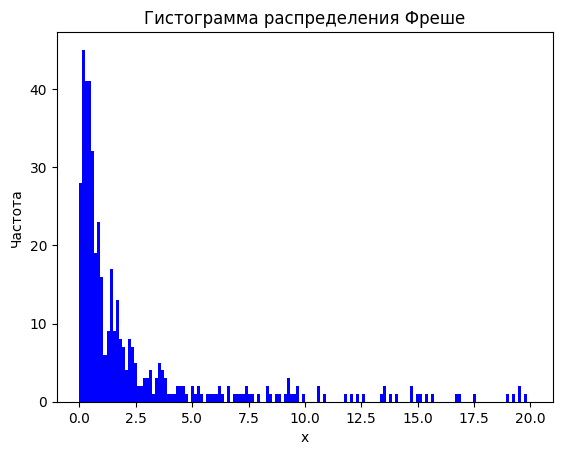

In [31]:
#1 exersice

# В этом номере 99 значений не включая (0, 0) так как не определено
g = 1.5

U = np.random.uniform(0, 1, size = 500)
X1 = ((-np.log(U)) ** (-g)) / g

#fig = plt.figure(figsize = (15, 5,))
#plt.subplot(1, 2, 1)
plt.hist(X1, bins = 150, range = (0, 20), color = 'blue')
plt.xlabel('x')
plt.ylabel('Частота')
plt.title("Гистограмма распределения Фреше")
plt.savefig(my_path + '/Exercise1.png')
plt.show()

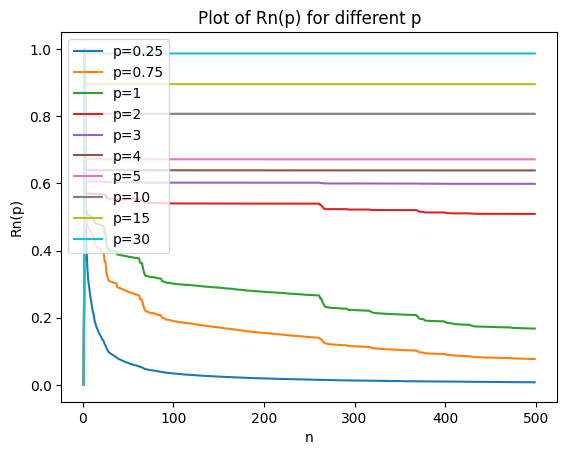

In [32]:
#2 exersice

arrP = [0.25, 0.75,1, 2, 3, 4, 5, 10, 15, 30] #задание диапозона на p
MaxP = len(arrP)
n = 0 
p = 0 
modX = np.zeros((MaxN, MaxP))
Rn = np.zeros((MaxN, MaxP))


for p in range(0, MaxP):
    modX[:, p] = np.power(np.abs(X), arrP[p])
    Mn = 0
    Sn = 0
    for n in range(1, MaxN): 
        Mn = np.max(modX[0:n, p])
        Sn = np.sum(modX[0:n, p])
        Rn[n][p] = Mn / Sn


pltN = np.arange(1, MaxN+1, 1)
legend = []

for p in range(0, MaxP):
    plt.plot(pltN, Rn[:, p])
    legend.append(f"p={arrP[p]}")
    
plt.legend(legend, loc="upper left")
plt.xlabel('n') #Подпись для оси х
plt.ylabel('Rn(p)') #Подпись для оси y
plt.title('Plot of Rn(p) for different p') #Название
plt.savefig(my_path + '/Exercise2.png')
plt.show()



#Не понятно как сделать выводы о моментах 

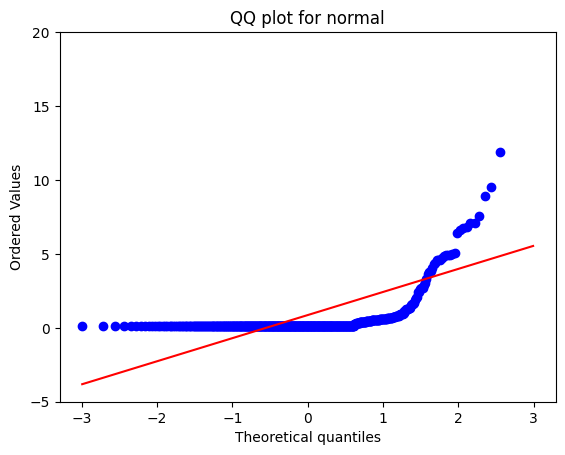

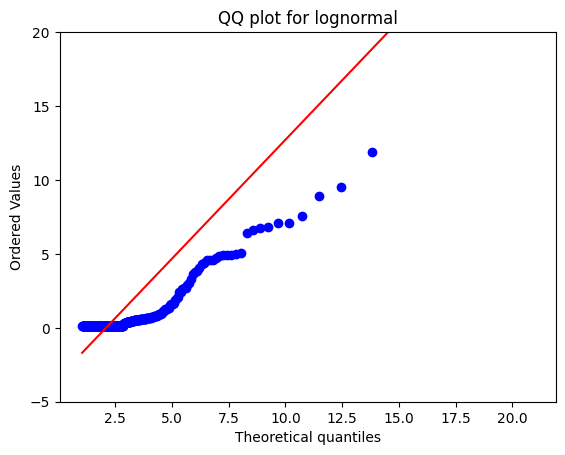

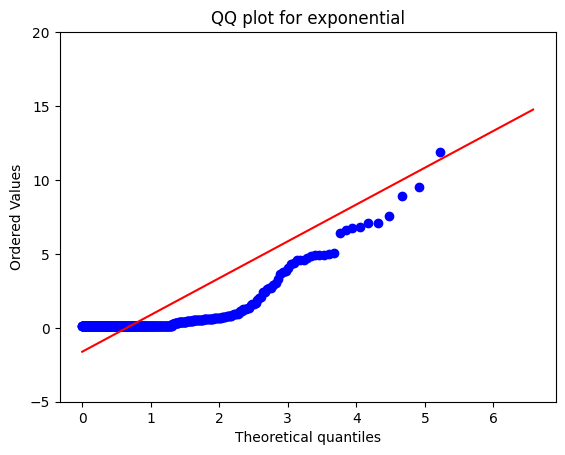

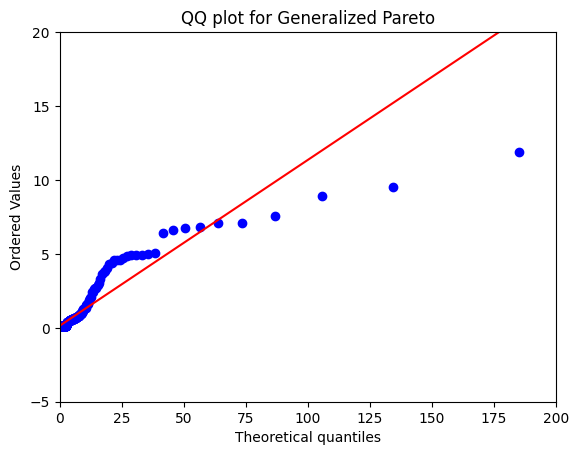

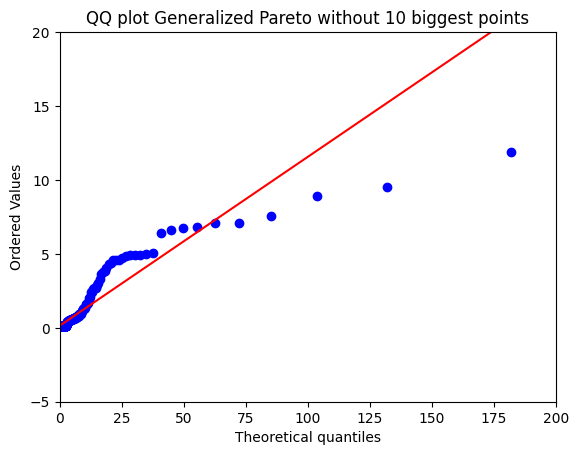

In [33]:
#3 exersice

stats.probplot(Xord, dist="norm", plot=plt)
plt.title('QQ plot for normal') #Название
plt.ylim([-5, 20])
plt.savefig(my_path + '/Exercise31.png')
plt.show()

stats.probplot(Xord, dist=stats.lognorm(1,1), plot=plt)
plt.title('QQ plot for lognormal') #Название
plt.ylim([-5, 20])
plt.savefig(my_path + '/Exercise32.png')
plt.show()

stats.probplot(Xord, dist=stats.expon, plot=plt)
plt.title('QQ plot for exponential') #Название
plt.ylim([-5, 20])
plt.savefig(my_path + '/Exercise33.png')
plt.show()

stats.probplot(Xord, dist=stats.genpareto(1), plot=plt)
plt.title('QQ plot for Generalized Pareto') #Название
plt.xlim([0, 200])
plt.ylim([-5, 20])
plt.savefig(my_path + '/Exercise34.png')
plt.show()

plt_dat = np.arange(1, 10, 1) 
Xord_noP = np.delete(Xord, plt_dat, axis=0)
stats.probplot(Xord_noP, dist=stats.genpareto(1), plot=plt)
plt.title('QQ plot Generalized Pareto without 10 biggest points') #Название
plt.xlim([0, 200])
plt.ylim([-5, 20])
plt.savefig(my_path + '/Exercise35.png')
plt.show()

#зависит ли QQ plot от параметров распределений типа (1, 1)
#В парето распределении какое задавать гамма и сигма

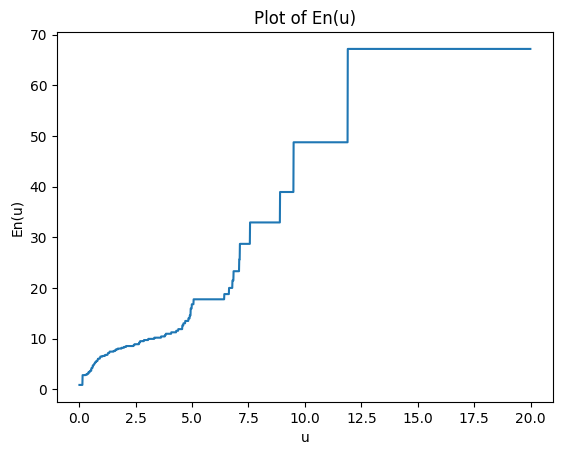

In [34]:
#4 exersice

U = np.arange(0.01, 20, 0.01)
En = np.zeros(len(U))
SumUp = 0
SumDn = 0

for u in range (0, len(U)):
    SumUp = 0
    SumDn = 0
    for i in range (0, len(X)):
        if (X[i] > U[u]):
            SumUp += X[i]
            SumDn += 1
    En[u] = SumUp / SumDn


pltN = np.arange(1, MaxN+1, 1)
legend = []

plt.plot(U, En)
plt.xlabel('u') #Подпись для оси х
plt.ylabel('En(u)') #Подпись для оси y
plt.title('Plot of En(u)') #Название
plt.savefig(my_path + '/Exercise4.png')
plt.show()


C:\Users\mikle\AppData\Local\Temp\ipykernel_12480\1221442093.py:57: RuntimeWarning: divide by zero encountered in scalar divide
  GammaP[k] = (1/np.log(2)) * (np.log((Xord[-(1+k)] - Xord[-(2*k+2)]) /(Xord[-(2*k+2)] - Xord[-(4*k+4)])))


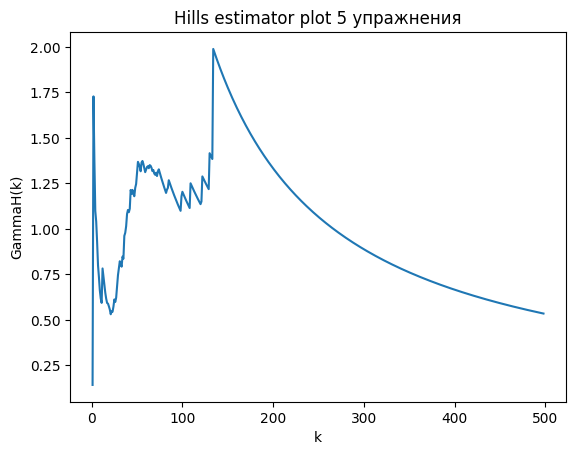

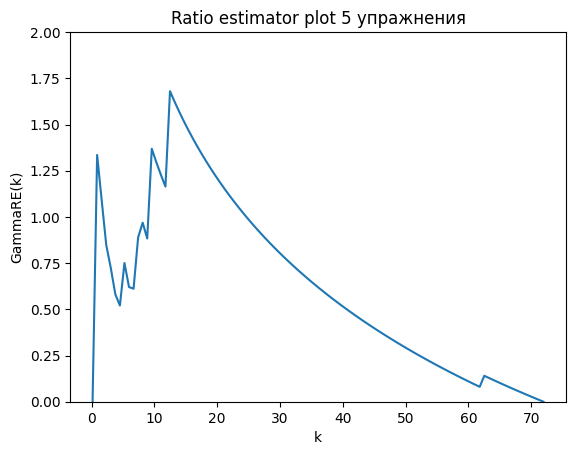

1.0763689298471353


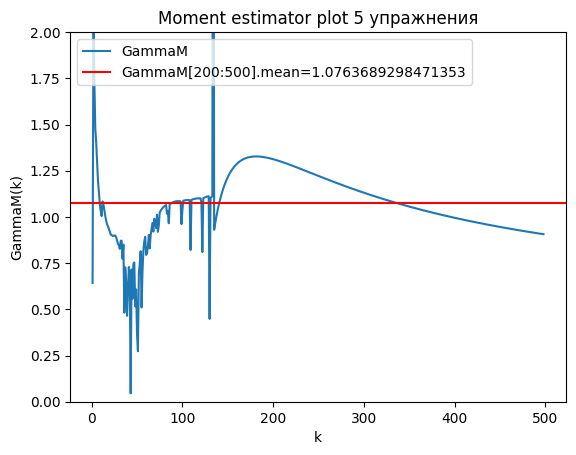

1.1311680283136947


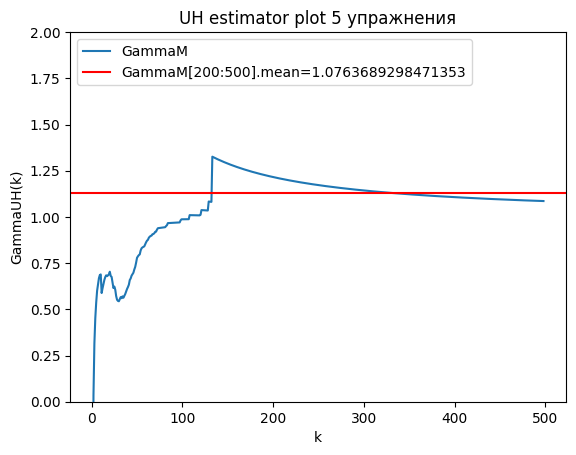

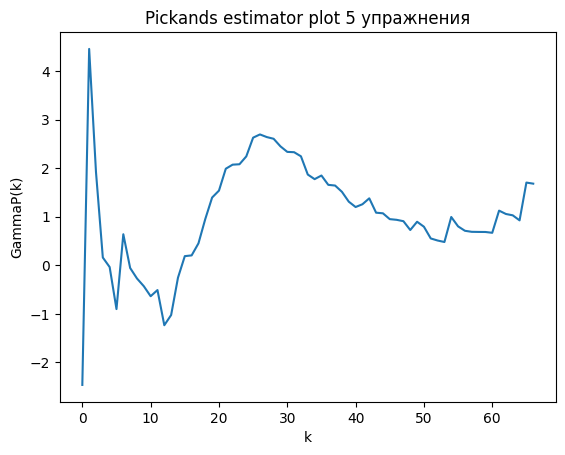

In [35]:
#5 exersice

MaxN = len(X) - 1
MaxNRange = len(X)
MaxK = len(X) - 1


#Hills estimator
def Hill(X):
    GammaH = np.zeros(MaxK)
    Xord = np.sort(X, axis=0)
    Max = len(X) - 1
    for k in range (0, Max):
        GammaH[k] = (1/(k+1)) * np.sum(np.log(Xord[-1:-(k+2):-1])) - np.log(Xord[-(k+2)])
    return GammaH

GammaH = Hill(X)


#Ratio estimator
Level = np.linspace(Xord[0], Xord[-1], 100)
REst = np.zeros(len(Level))

for n in range (1, len(Level)-1):
    SumUp = 0
    SumDn = 0
    for i in range(0, len(X)):
        if (X[i] > Level[n]):
            SumUp += np.log(X[i] / Level[n])
            SumDn += 1
    REst[n] = SumUp / SumDn


#Moment estimator
GammaM = np.zeros(MaxK)
for k in range (0, MaxK):
    SumDn = 0
    for i in range(0, k+1): 
        SumDn += (np.log(Xord[-1-i+1]) - np.log(Xord[-1-k])) ** 2
    SumDn /= k+1
    GammaM[k] = GammaH[k] + 1 - 0.5 / (1 - (GammaH[k] ** 2) / SumDn)


#UH estimator
GammaUH = np.zeros(MaxK)
UH = np.zeros(MaxK)
for i in range(0, MaxK):
    UH[i] = Xord[-(i+2)] * GammaH[i]

for k in range (0, MaxK-1):
    GammaUH[k] = (1/(k+1)) * np.sum(np.log(UH[0:k+1])) - np.log(UH[k+1])  
GammaUH[MaxK-1] = GammaUH[MaxK-2]

#Pickands's estimator
GammaP = np.zeros(round(MaxK/4))
for k in range(0, round(MaxK/4)):
    GammaP[k] = (1/np.log(2)) * (np.log((Xord[-(1+k)] - Xord[-(2*k+2)]) /(Xord[-(2*k+2)] - Xord[-(4*k+4)])))
    

PltN = np.arange(1, MaxN+1, 1)
PltP = np.arange(0, round(MaxK/4), 1)
legend = []

plt.plot(PltN, GammaH)
plt.xlabel('k') #Подпись для оси х
plt.ylabel('GammaH(k)') #Подпись для оси y
plt.title('Hills estimator plot 5 упражнения') #Название
plt.savefig(my_path + '/Exercise51.png')
plt.show()

plt.plot(Level, REst)
plt.xlabel('k') #Подпись для оси х
plt.ylabel('GammaRE(k)') #Подпись для оси y
plt.title('Ratio estimator plot 5 упражнения') #Название
plt.ylim(0, 2)
plt.savefig(my_path + '/Exercise52.png')
plt.show()

plt.plot(PltN, GammaM)
plt.axhline(y = GammaM[200:500].mean(), color = 'r', linestyle = '-')
print(GammaM[200:500].mean())
legend.append("GammaM")
legend.append(f"GammaM[200:500].mean={GammaM[200:500].mean()}")
plt.xlabel('k') #Подпись для оси х
plt.ylabel('GammaM(k)') #Подпись для оси y
plt.title('Moment estimator plot 5 упражнения') #Название
plt.ylim(0, 2)
plt.legend(legend, loc="upper left")
plt.savefig(my_path + '/Exercise53.png')
plt.show()

legend = []
plt.plot(PltN, GammaUH)
plt.axhline(y = GammaUH[200:500].mean(), color = 'r', linestyle = '-')
print(GammaUH[200:500].mean())
plt.xlabel('k') #Подпись для оси х
plt.ylabel('GammaUH(k)') #Подпись для оси y
plt.title('UH estimator plot 5 упражнения') #Название
plt.ylim(0, 2)
legend.append("GammaM")
legend.append(f"GammaM[200:500].mean={GammaM[200:500].mean()}")
plt.legend(legend, loc="upper left")
plt.savefig(my_path + '/Exercise54.png')
plt.show()

plt.plot(PltP, GammaP)
plt.xlabel('k') #Подпись для оси х
plt.ylabel('GammaP(k)') #Подпись для оси y
plt.title('Pickands estimator plot 5 упражнения') #Название
#plt.ylim(0, 2)
plt.savefig(my_path + '/Exercise55.png')
plt.show()
#Прочитать, что значит знак гаммы
#Как выбирать xn в Ratio Estimator, он из выборки или нет.

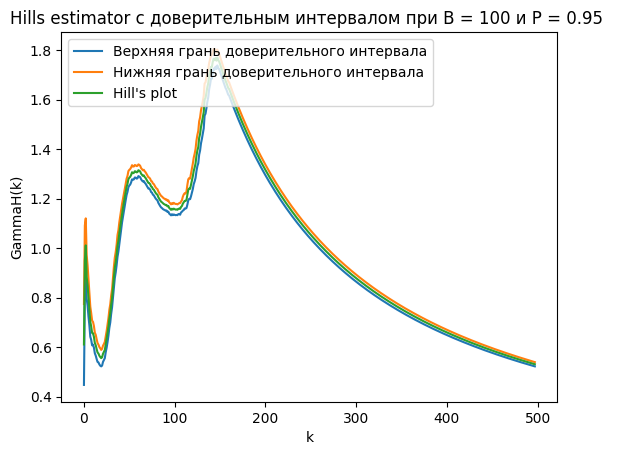

In [36]:
#6 exersice

MaxN = len(X)
B = 100
PlotCIup = []
PlotCIdn = []
PlotCImn = []

#Bootstrap
y = np.zeros((B, MaxN))
GammaH_Boot = np.zeros((B, MaxN-1))
Gamma_stable = np.zeros(B) #стабильность графика замечается на 300 значении

#StDev_Gamma = np.zeros(B)
for i in range(B):
    for j in range(MaxN):
        y[i,j] = random.choice(list(X))
    GammaH_Boot[i,:] = Hill(y[i,:])
#        Mean_Gamma[i] = GammaH_Boot[i,:].mean()
#        StDev_Gamma[i] = GammaH_Boot[i,:].std()
#    Gamma_stable[i] = GammaH_Boot[i, 300]

for i in range(MaxN-1):
#    Data75 = stats.norm.interval(0.75, loc=np.mean(Gamma_stable), scale=stats.sem(Gamma_stable))
    Data95 = stats.norm.interval(0.95, loc=np.mean(GammaH_Boot[:, i]), scale=stats.sem(GammaH_Boot[:, i]))
#    Data99 = stats.norm.interval(0.99, loc=np.mean(Gamma_stable), scale=stats.sem(Gamma_stable))
    PlotCIup.append(Data95[0])
    PlotCIdn.append(Data95[1])
    PlotCImn.append(GammaH_Boot[:, i].mean())

legend = []

plt.plot(PlotCIup)
legend.append("Верхняя грань доверительного интервала")
plt.plot(PlotCIdn)
legend.append("Нижняя грань доверительного интервала")
plt.plot(PlotCImn)
legend.append("Hill's plot")

plt.legend(legend, loc="upper left")
plt.xlabel('k') #Подпись для оси х
plt.ylabel('GammaH(k)') #Подпись для оси y
plt.title(f"Hills estimator с доверительным интервалом при B = {B} и P = {0.95} ") #Название
plt.savefig(my_path + '/Exercise6.png')
plt.show()


